# Time Series Analysis - Forecasting Gold Prices

#### Task: Using historical Gold data, Predict prices for the future

## Introduction


#### We are predicting the Gold prices by analyzing the trends and patterns present in the historical gold data for the period of Jan- 2010 and Dec-2023.
#### Data Source: World Gold Council - Gold Spot Prices
#### We will be using famous time series model ARIMA (Auto Regressive Integrated Moving Average), which is a one of the latest very advanced time series model which helps in predicting the future values of a series. In this Gold price prediction model, we will be doing a Uni-variate time series analysis which makes the model easy to implement and execute as it depends on only dependent variable that is time.
#### Once the model building is done, we will be plotting the future forecasting to see how the data changes over time using diagnostics plot
#### We will also be computing the RMSE value which shows us how far our prediction fall from the actual true values present in out data set.
#### Our dataset contains the gold prices of different currencies and its respective dates, in which we will be using only INR prices as our target variable.

# Contents


1. **[Import Basic Packages](#import_packages)**
2. **[Load Data Set](#load_data)**
3. **[Data Preparation](#data_preparation)**
    - 3.1 - [Check Dimensions of Dataset](#data_dimension)
    - 3.2 - [Study the Data](#Stat_sum)
    - 3.3 - [Missing Values](#Missing_values)
    - 3.4 - [Univariate Dataset](#univariate_dataset)
    - 3.5 - [Indian Gold Standardization](#Gold_convert)
    - 3.6 - [Grouping and Indexing](#index)
    - 3.7 - [Study the final dataset](#final_set)
4. **[Time Series Analysis](#Time_Series_Analysis)**
    - 4.1 - [Visualizing data](#Visualizing_data)
    - 4.2 - [Re-Sampling](#Sampling)
    - 4.3 - [Checking Stationarity](#Checking_Stationarity)
        - 4.3.1 - [Stationarity using Visualization](#plot)
        - 4.3.2 - [ADF Test](#ADF)
        - 4.3.3 - [KPSS Test](#KPSS)
        - 4.3.4 - [Differencing](#diff)
    - 4.4 - [Decomposing](#Decomposing)
5. **[Time Series Forcasting using ARIMA](#Time_Series_Forcasting_using_ARIMA)**
    - 5.1 - [Train Test Data Split](#split)
    - 5.2 - [Parameter Selection](#Parameter_Selection)
    - 5.3 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.4 - [Forecasting Diagnostics Plot](#diag)
    - 5.5 - [Validating Forecasts](#Validating_Forecasts)
    - 5.6 - [Calculating MSE and RMSE](#Calculating_MSE_and_RMSE)
    - 5.7 - [Visualizing the Forecast](#Visualizing_the_Forecast)
    - 5.8 - [Comparing the Predictions](#Comparing_the_predictions)
6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
# 1. Import Basic Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

<a id='load_data'></a>
# 2. Load Data Set

In [4]:
wgc_df=pd.read_excel("/Users/krishnakumarc/Documents/PGA_17/Machine Learning/ML Projects/ML-Capstone Project/WGC_Gold_Prices.xlsx")
wgc_df.head()

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,2010-01-01,1087.50,758.42,100463.25,677.02,1147.31,1127.09,50846.06,7422.51,1641.58,4078.89,10254037.5,3994.61,36300.75,20090475.00,5967.22,1266393.75,32961.58,8033.58,1215.36
1,2010-01-04,1121.50,778.01,103951.84,695.46,1165.91,1154.25,51942.27,7656.82,1652.53,4205.96,10501726.0,4120.39,37183.33,20718591.00,6140.21,1290397.90,33538.46,8173.83,1229.45
2,2010-01-05,1123.25,780.52,102844.77,701.86,1165.71,1159.53,51944.70,7668.65,1656.01,4212.41,10486662.0,4125.70,37246.97,20756536.75,6138.56,1279213.26,33444.77,8215.79,1230.82
3,2010-01-06,1130.00,784.45,104525.00,706.43,1168.08,1162.09,51817.84,7714.96,1664.60,4237.61,10429900.0,4150.49,37408.65,20881270.00,6160.53,1283600.90,33577.95,8254.42,1230.13
4,2010-01-07,1130.25,789.06,105294.09,708.93,1170.26,1167.55,51646.77,7717.01,1664.86,4238.55,10461594.0,4151.75,37445.18,20883629.25,6162.69,1281364.43,33653.19,8403.07,1231.08


<a id='data_preparation'></a>
# 3. Data Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation is all about cleaning and structuring the dataset to use for the model building. <br><br>
                        Here we will be performing the following steps:<br>
                        1. Check the dimensions and data types of the dataframe.<br>
                        2. Study the data and the statistical summary of the dataset.<br> 
                        3. Check for missing values.<br>
                        4. Delete the other columns for a univariate data set.<br>
                        5. Converting the Gold weightage from Troy Ounce to Grams (Indian Standardization).<br>
                        6. Grouping and Indexing the Date column.<br>
                        7. Check the shape and size of the final data set.<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='data_dimension'></a>
## 3.1 Check Dimensions of Dataset

In [5]:
wgc_df.shape

(3641, 20)

Our dataset contains "wgc_df" contains 3641 rows and 20 columns.

<a id='Stat_sum'></a>
## 3.2 Study the Data

In [6]:
wgc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3641 entries, 0 to 3640
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3641 non-null   datetime64[ns]
 1   USD     3641 non-null   float64       
 2   EUR     3641 non-null   float64       
 3   JPY     3641 non-null   float64       
 4   GBP     3641 non-null   float64       
 5   CAD     3641 non-null   float64       
 6   CHF     3641 non-null   float64       
 7   INR     3641 non-null   float64       
 8   CNY     3641 non-null   float64       
 9   TRY     3641 non-null   float64       
 10  SAR     3641 non-null   float64       
 11  IDR     3641 non-null   float64       
 12  AED     3641 non-null   float64       
 13  THB     3641 non-null   float64       
 14  VND     3641 non-null   float64       
 15  EGP     3641 non-null   float64       
 16  KRW     3641 non-null   float64       
 17  RUB     3641 non-null   float64       
 18  ZAR     

Using info( ) function, we can seen that the data indexes from 0 to 3640, list of the columns and its datatype.
As per the data definition, all the countires price columns are in float and date column is in datetime datatype, which is proper as expected.

In [7]:
wgc_df.describe()

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
count,3641,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3641.000000,3.641000e+03,3641.000000,3641.000000,3.641000e+03,3641.000000,3.641000e+03,3641.000000,3641.000000,3641.000000
mean,2016-12-23 19:11:41.016204032,1482.520585,1251.803139,159606.782837,1063.117800,1795.625098,1403.410168,97552.708698,9784.227374,10070.704556,5561.577600,1.886975e+07,5445.252076,48269.048069,3.290598e+07,20249.398245,1.719815e+06,83999.320190,19166.790357,1879.586935
min,2010-01-01 00:00:00,1049.400000,758.420000,94489.980000,671.910000,1116.610000,1040.270000,49435.050000,6710.800000,1609.550000,3938.190000,9.958548e+06,3854.450000,35112.900000,1.954549e+07,5789.910000,1.222196e+06,32323.290000,8033.580000,1196.300000
25%,2013-06-28 00:00:00,1252.550000,1042.940000,132829.510000,853.620000,1473.340000,1216.360000,77767.490000,8227.200000,2886.120000,4697.880000,1.505584e+07,4600.620000,41148.600000,2.746318e+07,9194.910000,1.400097e+06,49866.920000,13624.600000,1505.070000
50%,2016-12-23 00:00:00,1375.250000,1150.040000,140637.010000,995.760000,1662.410000,1315.850000,86187.190000,9008.530000,4100.480000,5157.600000,1.679029e+07,5051.290000,44086.150000,3.022328e+07,21020.250000,1.558308e+06,75931.190000,16463.420000,1666.070000
75%,2020-06-19 00:00:00,1736.250000,1488.670000,186177.950000,1283.110000,2209.090000,1626.440000,129118.240000,11438.440000,12094.890000,6515.030000,2.505189e+07,6377.540000,54747.540000,3.980856e+07,27257.980000,2.005060e+06,105910.520000,25771.830000,2378.760000
max,2023-12-15 00:00:00,2067.150000,1892.710000,302550.320000,1643.810000,2780.780000,1894.070000,170788.320000,14636.360000,59257.720000,7753.670000,3.182260e+07,7592.640000,72548.430000,4.969356e+07,63364.210000,2.708868e+06,285610.400000,39005.480000,3150.180000
std,NaN,270.750020,277.744748,45504.811752,259.172889,417.135844,222.119504,30065.657994,1971.313849,12428.490818,1016.271886,5.561107e+06,994.417401,9177.572083,7.080986e+06,13912.828446,3.910291e+05,40021.538952,7758.034183,506.367986


Using the describe function, we are computing the statistical summary of all numeric variables in the dataset. Since we dont have any object type variable, no need to try the object type statistical summary.

<a id='Missing_values'></a>
## 3.3 Check Missing Values

In [8]:
wgc_df.isnull().sum()

Date    0
USD     0
EUR     0
JPY     0
GBP     0
CAD     0
CHF     0
INR     0
CNY     0
TRY     0
SAR     0
IDR     0
AED     0
THB     0
VND     0
EGP     0
KRW     0
RUB     0
ZAR     0
AUD     0
dtype: int64

Using the isnull( ) function, we have checked for any missing values in the dataset and as per the above results, there is no missing values present in our dataset. Hence missing value treatment is no longer required.

<a id='univariate_dataset'></a>
## 3.4 Univariate Dataset

In [9]:
del_cols=["USD","EUR","JPY","GBP","CAD","CHF","AUD","CNY","TRY","SAR","IDR","AED","THB","VND","EGP","KRW","RUB",
         "ZAR",]
wgc_df=wgc_df.drop(del_cols,axis=1)
wgc_df.head()

,Date,INR
0,2010-01-01,50846.06
1,2010-01-04,51942.27
2,2010-01-05,51944.70
3,2010-01-06,51817.84
4,2010-01-07,51646.77


As we are doing a univariate time series analysis model, we are deleting all other columns except the date column and the target variable which is INR prices.

<a id='Gold_convert'></a>
## 3.5 Indian Gold Standardization

Currently the gold prices are in troy ounce measurements which was the default measure of the World Gold Council's dataset. As per India, the standard gold measurements is in Grams(gms). So we will be converting the troy ounce to grams with the exact measurements.

In [10]:
troy_ounce=31.1034768 ## World Gold Council Measurement...

wgc_df["INR"]=wgc_df["INR"]/troy_ounce
wgc_df.head()

,Date,INR
0,2010-01-01,1634.738789
1,2010-01-04,1669.982759
2,2010-01-05,1670.060885
3,2010-01-06,1665.982242
4,2010-01-07,1660.482213


<a id='index'></a>
## 3.6 Grouping and Indexing

Grouping - If we have any duplicate date records, we should be grouping the data by computing the sum to have unique date values across the dataset.
Indexing - Indexing the date column and keep only the price as normal variable for univariate time series model building.

In [11]:
duplicated=wgc_df[wgc_df["Date"].duplicated()]
duplicated

,Date,INR


Since there is no dupliacte dates, Hence grouping is not required.

In [12]:
wgc_df.set_index("Date",inplace=True)
wgc_df.head()

,INR
Date,
2010-01-01,1634.738789
2010-01-04,1669.982759
2010-01-05,1670.060885
2010-01-06,1665.982242
2010-01-07,1660.482213


Indexing for Date column is now done in the above code, which makes our datset suitable for Uni-variate analysis.

<a id='final_set'></a>
## 3.7 Study the Final Set

In [13]:
print("Final Dataset Dimensions: ",wgc_df.shape)
print("\n")
print("Dataset Info: ",wgc_df.info())

Final Dataset Dimensions:  (3641, 1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3641 entries, 2010-01-01 to 2023-12-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INR     3641 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB
Dataset Info:  None


<a id='Time_Series_Analysis'></a>
# 4. Time Series Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we will be analysis Time series data by performing the following steps: <br><br>
                        1. Visualizing Data <br>
                        2. Re-Sampling<br>
                        3. Checking Stationarity <br>
                        4. Decomposing<br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Visualizing_data'></a>
## 4.1 Visualizing data

Plotting our time series data using plot... In all time series plots, X-axis will be the time variable and Y-axis will be the variable of interest.

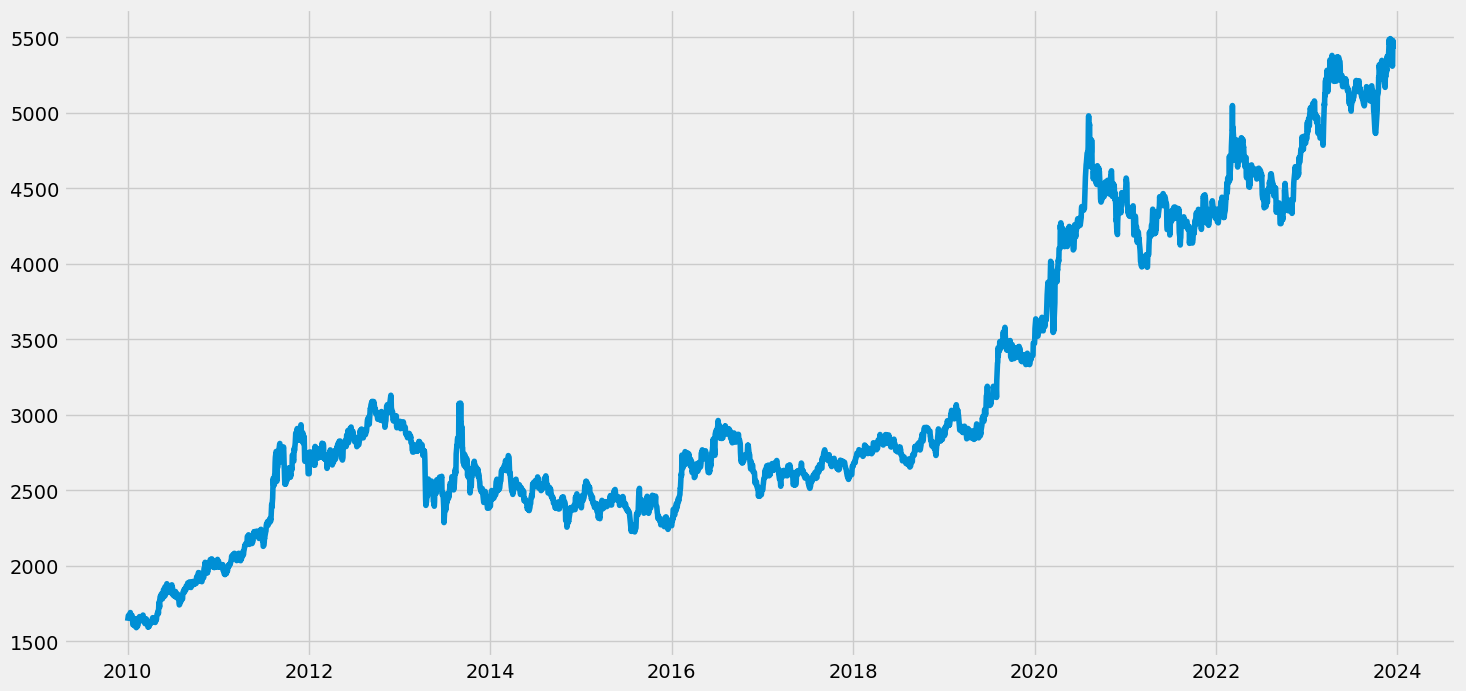

In [14]:
plt.figure(figsize=(16,8))
plt.plot(wgc_df)
plt.show()

**Both long run increase trend could be found in the above plot.**

<a id='Sampling'></a>
## 4.2 Re-Sampling

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> In order to use any data for time series analysis, our data should be conisistent and has to have regular time intervals for a accurate and robust model.
For Example, If one data point is in monthly frequency, then all other data should be in monthly frequency. Which makes a consistent time series data.<b>
                        
In our case, It is observred that we have data for all days in a week except weekends mostly (Saturday & Sunday). This pattern varies from month to month as one month has 4 weeks and one has 5 which makes a big difference in the number of obsertations per month which eventually affetcs the accuracy of the model as each data point should follow the same frequency and each month should have the equal number of observations.
                        
So to achieve this, we will be re-sampling the data taking the 1st day of the month as the data point for the whole month and computing mean of the price which makes only 12 data points per year.
Hence our data is in proper frequency and well balanced.<br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
data=wgc_df["INR"].resample("MS").mean()
data.head()

Date
2010-01-01    1649.636404
2010-02-01    1631.796948
2010-03-01    1628.321095
2010-04-01    1641.491936
2010-05-01    1776.537268
Freq: MS, Name: INR, dtype: float64

<a id='Checking_Stationarity'></a>
## 4.3 Checking Stationarity

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> As a Time Series model specified preprocessing steps, We should check whether there is any trend or seasonal compontent present in our dataset which affects the accuarcy of the data, As there shouldn't be any data depends on time at which the series is observed.<br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='plot'></a>
### 4.3.1 Stationarity using Visualization

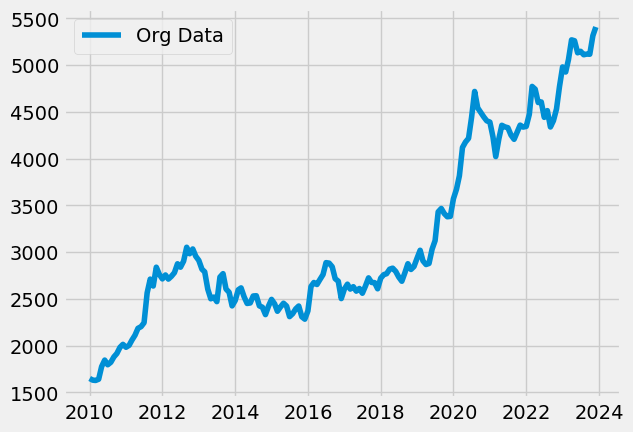

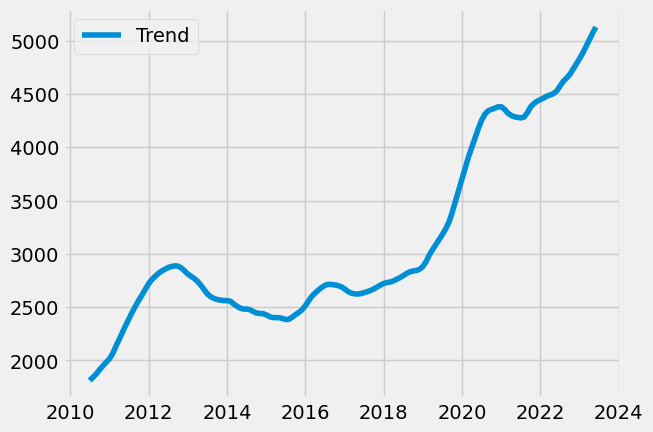

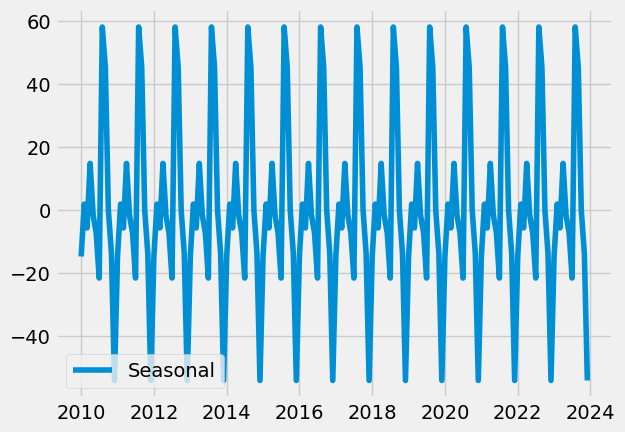

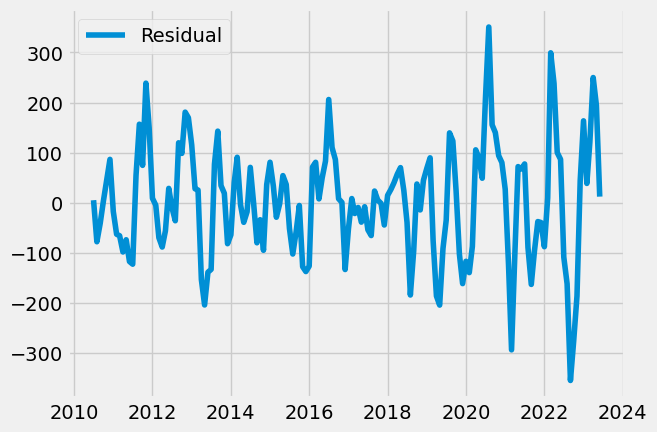

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data)

plt.plot(data,label="Org Data")
plt.legend(loc="best")
plt.show()

trend=decomp.trend
plt.plot(trend,label="Trend")
plt.legend(loc="best")
plt.show()

seasonal=decomp.seasonal
plt.plot(seasonal,label="Seasonal")
plt.legend(loc="best")
plt.show()

residual=decomp.resid
plt.plot(residual,label="Residual")
plt.legend(loc="best")
plt.show()

<a id='ADF'></a>
### 4.3.2 Augmented Dickey-Fuller(ADF) Test

Augmented Dickey-Fuller(ADF) test is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. 

**Formed Hypothesis:**

**Null Hypothesis: P-Value is greater than the level of significance (Not Stationary)**

**Alternate Hypothesis: P-Value is less than the level of significance (Stationary)**

**Level of Significance: 0.05**

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.056513
p-value: 0.962963
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


The Above ADF test clearly shows that our data is not stationary and which cannot be used for time series model building, because it has seasonal component present.
Confirming the same using KPSS test also.

<a id='KPSS'></a>
### 4.3.3 KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

KPSS test is also another popular and more widely used statistical test to check whether your time series is stationary or non-stationary. 

**Formed Hypothesis:**

**Null Hypothesis: P-Value is greater than the level of significance (Stationary)**

**Alternate Hypothesis: P-Value is lesser than the level of significance (Not Stationary)**

**Level of Significance: 0.05**

In [18]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
kpss_test(data)

Results of KPSS Test:
Test Statistic           1.595328
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Both ADF & KPSS test showed that our data is not stationary.

**Hence its concluded that our dataset is NOT STATIONARY** 

In order to make the data stationary, We need to remove the trend and the seasonal component present in our dataset. 

<a id='diff'></a>
### 4.3.4 Differencing

Performing Differencing to Remove Seasonality from our dataset.

**Differencing: Subtracting the previous observation from the current observation to stabilize the mean of the time by changing the level of the time.**

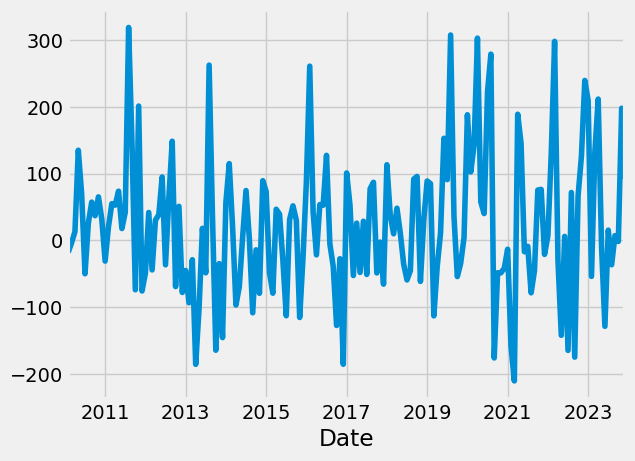

In [19]:
data=data-data.shift(1)
data.dropna(inplace=True)
data.plot()
plt.show()

In [20]:
# Print and check the top 5 rows for reference:

data.head()

Date
2010-02-01    -17.839456
2010-03-01     -3.475853
2010-04-01     13.170842
2010-05-01    135.045332
2010-06-01     69.694144
Freq: MS, Name: INR, dtype: float64

<a id='Decomposing'></a>
### 4.5  Decomposing

Decomposing the time series into three distinct components: trend, seasonality, and noise.

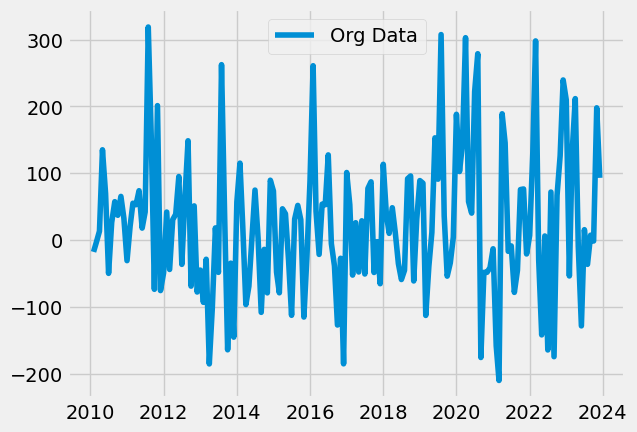

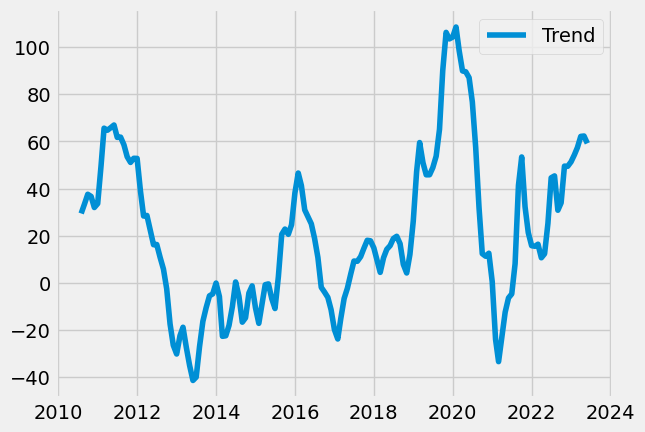

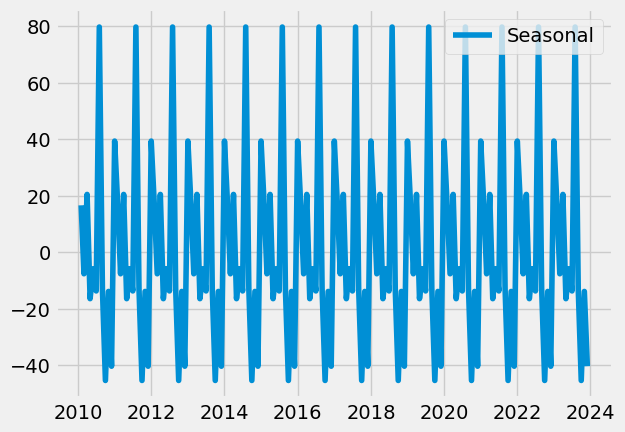

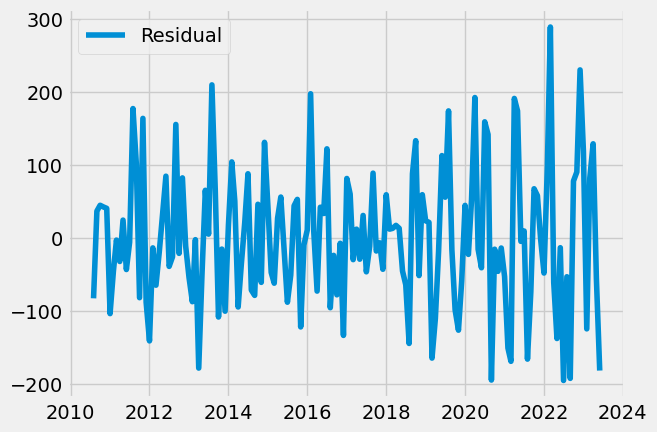

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data)

plt.plot(data,label="Org Data")
plt.legend(loc="best")
plt.show()

trend=decomp.trend
plt.plot(trend,label="Trend")
plt.legend(loc="best")
plt.show()

seasonal=decomp.seasonal
plt.plot(seasonal,label="Seasonal")
plt.legend(loc="best")
plt.show()

residual=decomp.resid
plt.plot(residual,label="Residual")
plt.legend(loc="best")
plt.show()

**Now we will be able to see a significant difference between plots from actual data and differencing applied data**

<a id='Time_Series_Forcasting_using_ARIMA'></a>
# 5. Time Series Forcasting using ARIMA

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> We will use be SARIMAX for forecasting our time series, because we found seasonal component in our dataset. 
                        ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [22]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Sample parameter combinations of SARIMAX...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Sample parameter combinations of SARIMAX...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<a id='split'></a>
## 5.1 Train Test Data Split

In [23]:
size = int(len(data) * 0.95)
train, test = data[0:size], data[size:len(data)]
print("Train Data: ",train.shape)
print("Test Data: ",test.shape)

Train Data:  (158,)
Test Data:  (9,)


<a id='Parameter_Selection'></a>
## 5.2 Parameter Selection

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We use “grid search” to find the optimal set of parameters that yields the best performance for our model.
                We are selecting those parameter which has minimum AIC score</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
from pylab import rcParams

aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(train, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit(disp=0)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append(results.aic)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1913.736207995576
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1777.2910261144134
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1853.6664175979745
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1641.5489450471157
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1787.919902391448
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1775.0779593054326
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1676.7385046161203
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1643.3653189429947
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1896.375838127399
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1760.4310222342933
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1833.8340884749
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1622.826943765978
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1782.3158914699043
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1757.4397211911032
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1668.885601789323
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1624.5483883260138
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1971.5759079781767
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1830.4287542581296


In [25]:
# Searching for the minimun AIC score:

min_aic=min(aic)
min_aic

1619.2287166387478

**The lowest AIC score generated is 1619 which has the SARIMA(1, 1, 1)x(0, 1, 1, 12)12 combination to be used for the model building.**

<a id='Fitting_the_ARIMA'></a>
## 5.3 Fitting the ARIMA model

**Using the optimal order and seasonal order SARIMAX combo values**

In [26]:
actual_model=sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(0,1,1,12),
                           enforce_stationarity=False,
                           enforce_invertibility=False)
actual_model_fit=actual_model.fit(disp=0)
print(actual_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                INR   No. Observations:                  158
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -805.614
Date:                            Sun, 31 Dec 2023   AIC                           1619.229
Time:                                    17:09:28   BIC                           1630.730
Sample:                                02-01-2010   HQIC                          1623.902
                                     - 03-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2361      0.089      2.656      0.008       0.062       0.410
ma.L1         -0.9803      0.044   

<a id='diag'></a>
## 5.4 Forecasting Diagnostics Plot

**Running model diagnostiscs to check any unusual behaviour**
<br>1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should have nearly the properties of white noise (variables are independent and identically distributed with a mean of zero).

<br>2. Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.

<br>3. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.

<br>4. Finally, visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

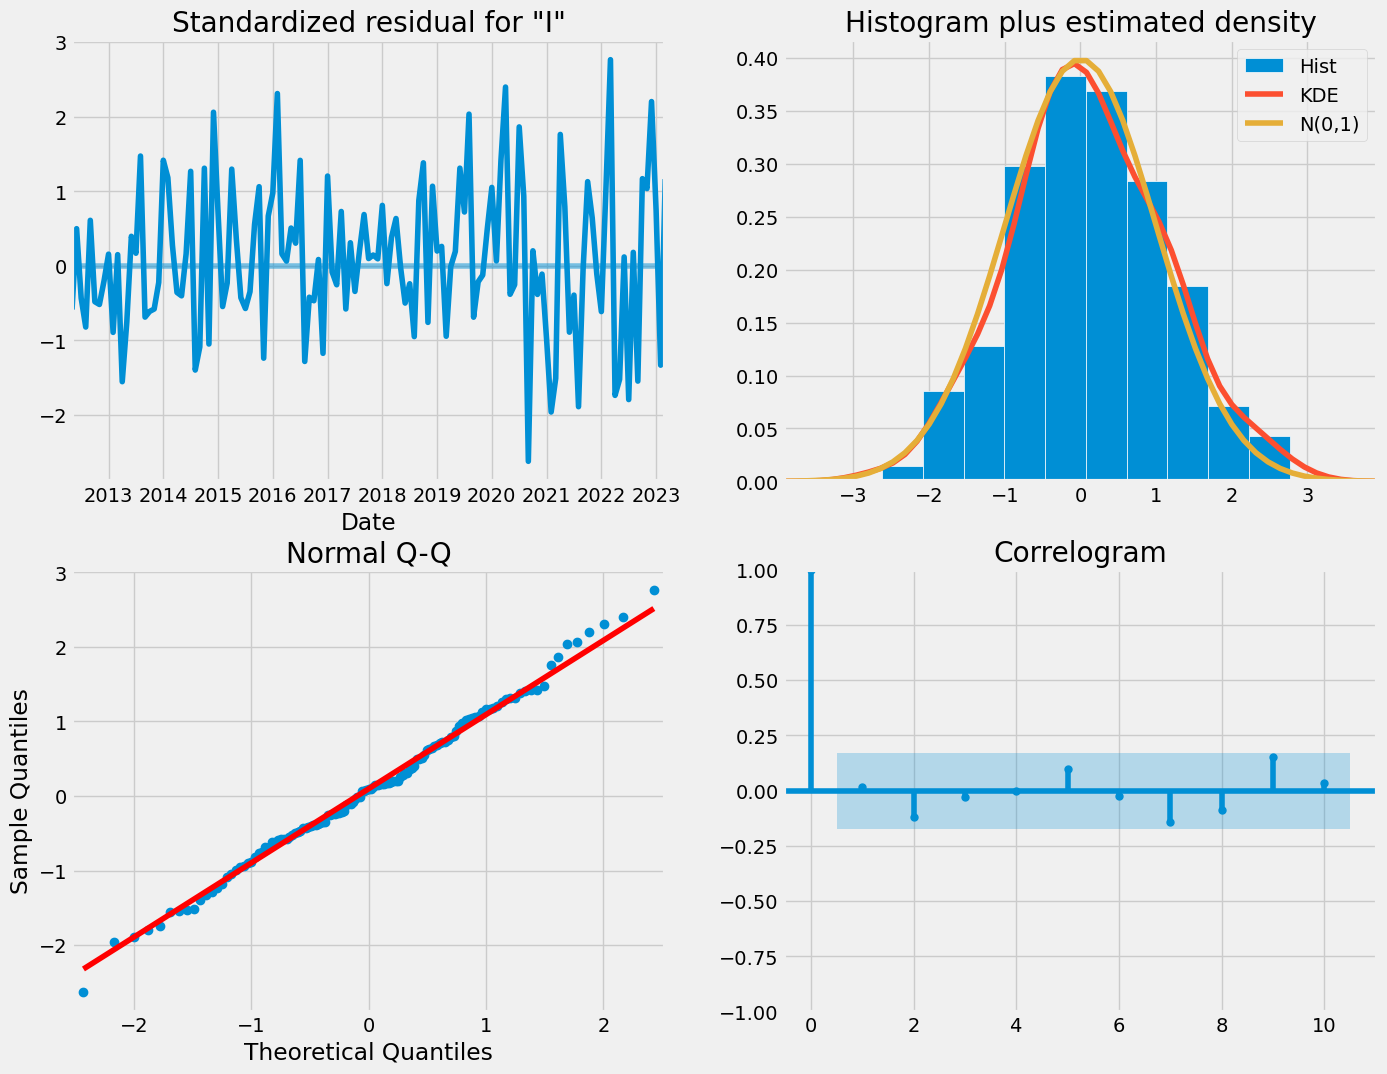

In [27]:
actual_model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

<a id='Validating_Forecasts'></a>
## 5.5 Validating Forecasts

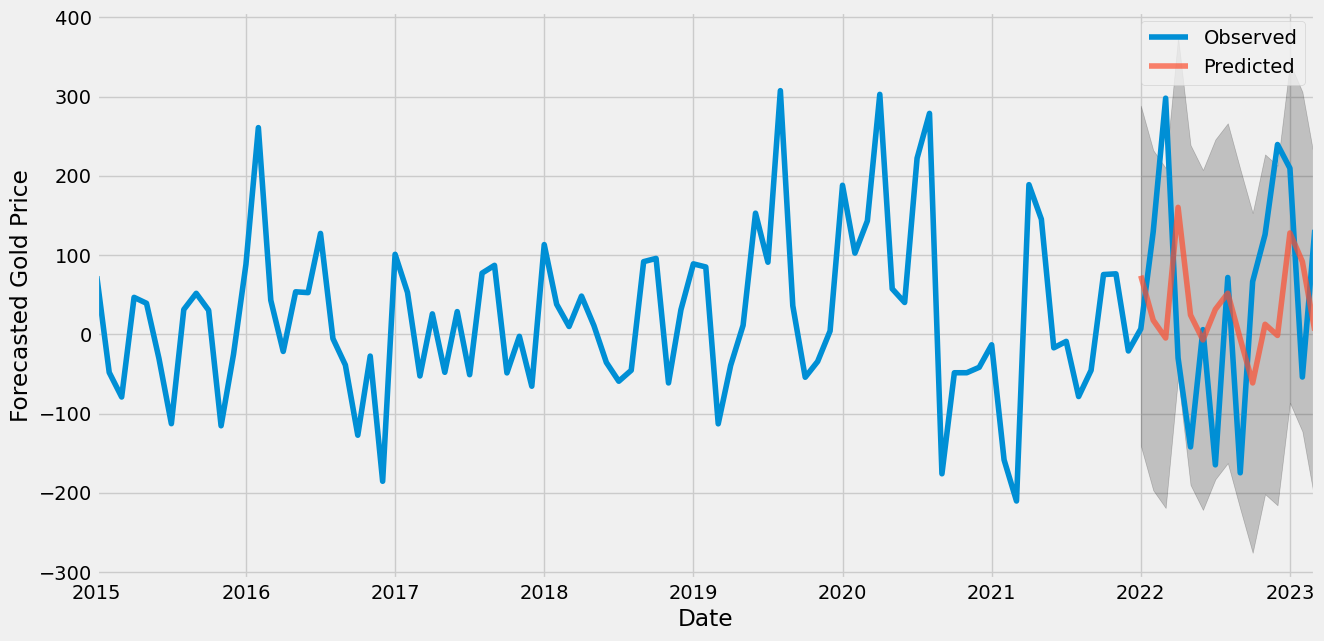

In [28]:
pred = actual_model_fit.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train['2015':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Forecasted Gold Price')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). 
It is observered that the predicted gold prices are matching with the increasing figures and not properly fitting into the decreasing figures.

<a id="Calculating_MSE_and_RMSE"> </a>
## 5.6 Calculating MSE and RMSE

In [29]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

data_forecasted = pred.predicted_mean
data_truth = train['2022-01-01':]

mse_v=mean_squared_error(data_forecasted,data_truth)
rmse_v=rmse(data_forecasted,data_truth)
print("Mean Squared Error of our forecasts is (MSE): ",mse_v)
print("Root Squared Error of our forecasts is (RMSE): ",rmse_v)

Mean Squared Error of our forecasts is (MSE):  24765.195271462297
Root Squared Error of our forecasts is (RMSE):  157.36961355821617


<a id="Visualizing_the_Forecast"> </a>
## 5.7 Visualizing the Forecast 

             lower INR   upper INR
2023-04-01 -126.995901  301.588168
2023-05-01 -195.164684  247.571650
2023-06-01 -181.680218  262.486544
2023-07-01 -210.457757  234.041791
2023-08-01 -116.223496  328.453075
2023-09-01 -239.743114  205.079423
2023-10-01 -212.950729  232.010730
2023-11-01 -194.596105  250.502602
2023-12-01 -199.051203  246.184345
2024-01-01 -129.139597  316.232679
2024-02-01 -181.714351  263.795529
2024-03-01 -170.301349  275.374392
2024-04-01 -156.731648  296.989806
2024-05-01 -203.671314  251.108254
2024-06-01 -186.172358  268.942367
2024-07-01 -214.072525  241.257492
2024-08-01 -119.651338  335.868452
2024-09-01 -243.144254  212.559386
2024-10-01 -216.362833  239.523213
2024-11-01 -198.028047  258.040012


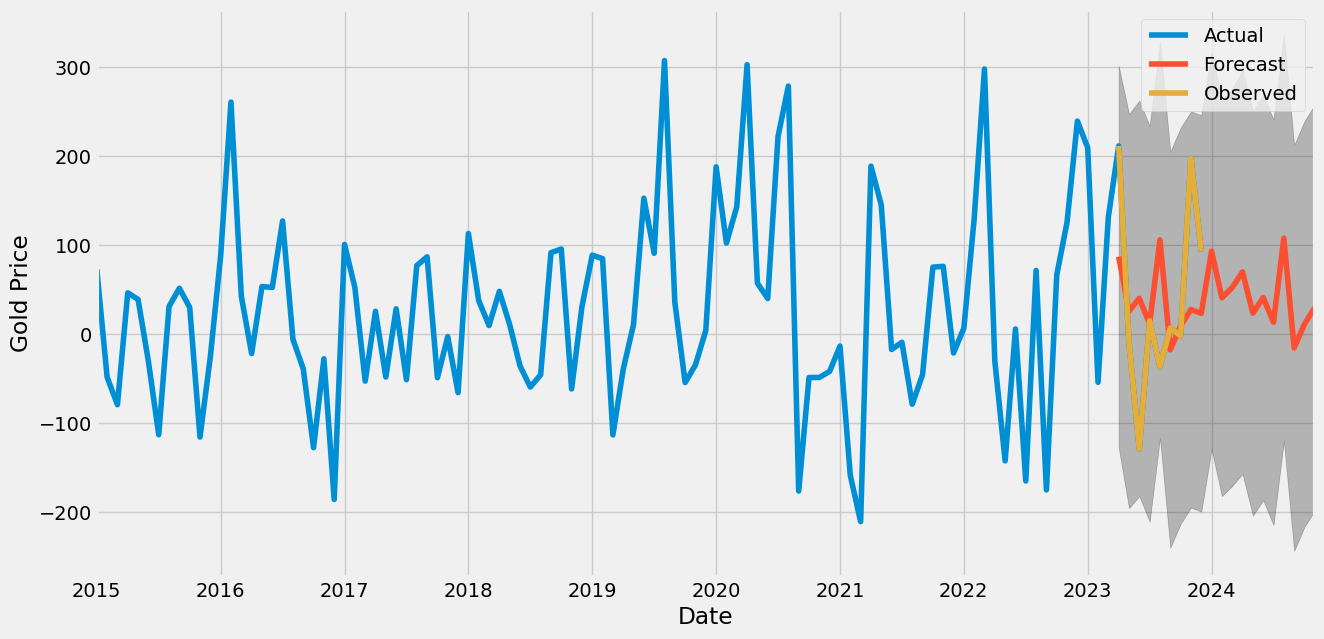

In [30]:
pred_uc = actual_model_fit.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = data["2015":].plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Gold Price')
test.plot(label = "Observed")
print(pred_ci)
plt.legend(loc = "best")
plt.show()

<a id="Comparing_the_predictions"> </a>
## 5.8 Comparing the predictions

In [31]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper INR']
Result

,Actual,Predicted
Date,,
2023-04-01,211.667385,301.588168
2023-05-01,-9.585642,247.571650
2023-06-01,-128.618771,262.486544
2023-07-01,15.410293,234.041791
2023-08-01,-36.457008,328.453075
2023-09-01,7.167953,205.079423
2023-10-01,-1.548643,232.010730
2023-11-01,197.913171,250.502602
2023-12-01,93.042668,246.184345


<a id="Conclusion"> </a>
# 6. Conclusion

**The above table shows that the predicted values are not fitting properly in the decreasing figures because of the unstability in the gold prices which was affected by various factors includes Global Market Trend, Inflation etc, and Cultural Significance in India like Festivals, Weddings are highly unaccountable factors.**